In [1]:
using DifferentialEquations, RecursiveArrayTools, Plots, DiffEqParamEstim
using Optimization, ForwardDiff, OptimizationOptimJL, OptimizationBBO

In [2]:
using CSV, DataFrames, Statistics

In [3]:
function lv(du,u,p,t)
    du[1] = 0.588720995244922.*u[1].*(1-(u[1]./34.6977250333074)) + p[1].*u[1].*u[2]
    du[2] = 0.48778580235423.*u[2].*(1-(u[2]./66.3061938040712)) + p[2].*u[1].*u[2]
end

u0=[0.5; 0.5]
tspan=(0.0,10.0)
p=[0.00005,0.00005]
prob=ODEProblem(lv,u0,tspan,p)

ODEProblem with uType Vector{Float64} and tType Float64. In-place: true
timespan: (0.0, 10.0)
u0: 2-element Vector{Float64}:
 0.5
 0.5

In [4]:
sol=solve(prob,Tsit5())

retcode: Success
Interpolation: specialized 4th order "free" interpolation
t: 12-element Vector{Float64}:
  0.0
  0.11339820522606896
  0.5034801580013211
  1.0863753262065945
  1.7777697776338957
  2.635824661115777
  3.6334648039640016
  4.7904937308860145
  6.111801586399017
  7.643458103735439
  9.418390321798716
 10.0
u: 12-element Vector{Vector{Float64}}:
 [0.5, 0.5]
 [0.5339896996358454, 0.5282112467327091]
 [0.669192773033078, 0.6378583276452043]
 [0.935790270016057, 0.8449763506848803]
 [1.3871500150030585, 1.1779162373520116]
 [2.24012527216841, 1.7738974311124507]
 [3.8330657593306556, 2.8386540502832247]
 [6.838912839004271, 4.835858938310373]
 [12.089053140234535, 8.647317582310468]
 [19.740237567558673, 15.96195065423609]
 [27.43548937788447, 28.54699428239923]
 [29.23089968070436, 33.24544570056633]

In [5]:
tyk5="C:\\Users\\adelpinoherrera\\Dropbox (UFL)\\research-share\\Adriana\\Conferences and Symposiums\\2023\\BMES\\Code\\co_culture_50_50.csv"
tyk5g=CSV.read(tyk5,DataFrame)
data_5=Matrix(tyk5g)

2×11 Matrix{Float64}:
 0.5  1.31562   1.84256   3.70933  5.25956  …  16.2845   15.049    12.4219
 0.5  0.719002  0.771849  1.53953  1.76482      8.28312   6.06353   8.66418

In [14]:
data_51_plot=data_5[1,:]
data_52_plot=data_5[2,:]

11-element Vector{Float64}:
 0.5
 0.71900161
 0.771848924
 1.539525692
 1.764822134
 2.798126189
 6.007905138
 7.644781145
 8.283121066
 6.06353389
 8.664178012

In [9]:
t = collect(range(0, stop = 10, length = 11))

11-element Vector{Float64}:
  0.0
  1.0
  2.0
  3.0
  4.0
  5.0
  6.0
  7.0
  8.0
  9.0
 10.0

In [10]:
cost_function = build_loss_objective(prob, Tsit5(), L2Loss(t, data_5),
                                     Optimization.AutoForwardDiff(),
                                     maxiters = 10000, verbose = false)

(::OptimizationFunction{true, AutoForwardDiff{nothing, Nothing}, DiffEqParamEstim.var"#29#30"{Nothing, typeof(DiffEqParamEstim.STANDARD_PROB_GENERATOR), Base.Pairs{Symbol, Integer, Tuple{Symbol, Symbol}, NamedTuple{(:maxiters, :verbose), Tuple{Int64, Bool}}}, ODEProblem{Vector{Float64}, Tuple{Float64, Float64}, true, Vector{Float64}, ODEFunction{true, SciMLBase.AutoSpecialize, typeof(lv), LinearAlgebra.UniformScaling{Bool}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, typeof(SciMLBase.DEFAULT_OBSERVED), Nothing, Nothing}, Base.Pairs{Symbol, Union{}, Tuple{}, NamedTuple{(), Tuple{}}}, SciMLBase.StandardODEProblem}, Tsit5{typeof(OrdinaryDiffEq.trivial_limiter!), typeof(OrdinaryDiffEq.trivial_limiter!), Static.False}, L2Loss{Vector{Float64}, Matrix{Float64}, Nothing, Nothing, Nothing}, Nothing, Tuple{}}, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing, Nothing

In [11]:
optprob = Optimization.OptimizationProblem(cost_function, [-0.06,0.06])
optsol = solve(optprob, BFGS())

u: 2-element Vector{Float64}:
 -1990.134465011335
 -1710.068431740779

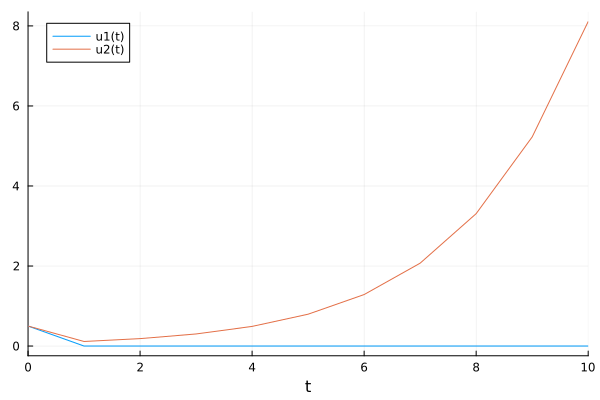

In [12]:
newprob = remake(prob, p = optsol.u)
newsol = solve(newprob, Tsit5(),saveat=1)
plot(newsol)

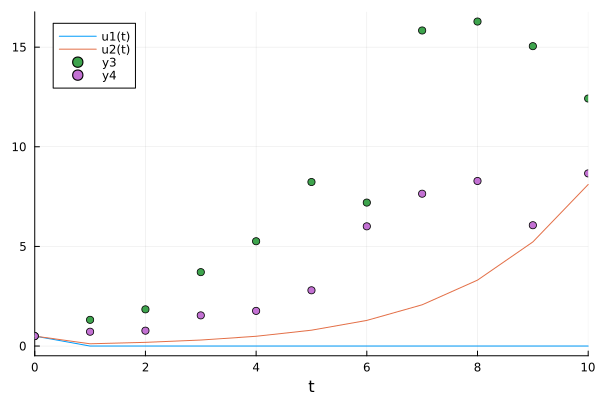

In [15]:
timepts = [0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, 9.0, 10.0];
scatter!(timepts,data_51_plot)
scatter!(timepts,data_52_plot)